In [1]:
!maturin develop

✏️ Setting installed package as editable


🔗 Found pyo3 bindings
🐍 Found CPython 3.12 at b:\dev\repos\Code\RustKShape\kshape-rs\.venv\Scripts\python.exe
📡 Using build options features from pyproject.toml
   Compiling pyo3-build-config v0.23.5
   Compiling kmax-rs v0.1.0 (B:\dev\repos\Code\RustKShape\kshape-rs)
   Compiling pyo3-macros-backend v0.23.5
   Compiling pyo3-ffi v0.23.5
   Compiling pyo3 v0.23.5
   Compiling pyo3-macros v0.23.5
   Compiling numpy v0.23.0
  --> src\lib.rs:43:5
   |
43 | use ndarray::Data;
   |     ^^^^^^^^^^^^^
   |
   = note: `#[warn(unused_imports)]` on by default

         = note: these implicit defaults are being phased out 
         = help: add `#[pyo3(signature = (k_clusters, x, n_max_iter=None, inertia_eps=None))]` to this function to silence this warning and keep the current behavior
   --> src\lib.rs:275:8
    |
275 |     fn kmax<'py>(
    |        ^^^^
    |
    = note: `#[warn(deprecated)]` on by default

   --> src\lib.rs:136:8
    |
120 | impl Clustering {
    | --------------- method in t

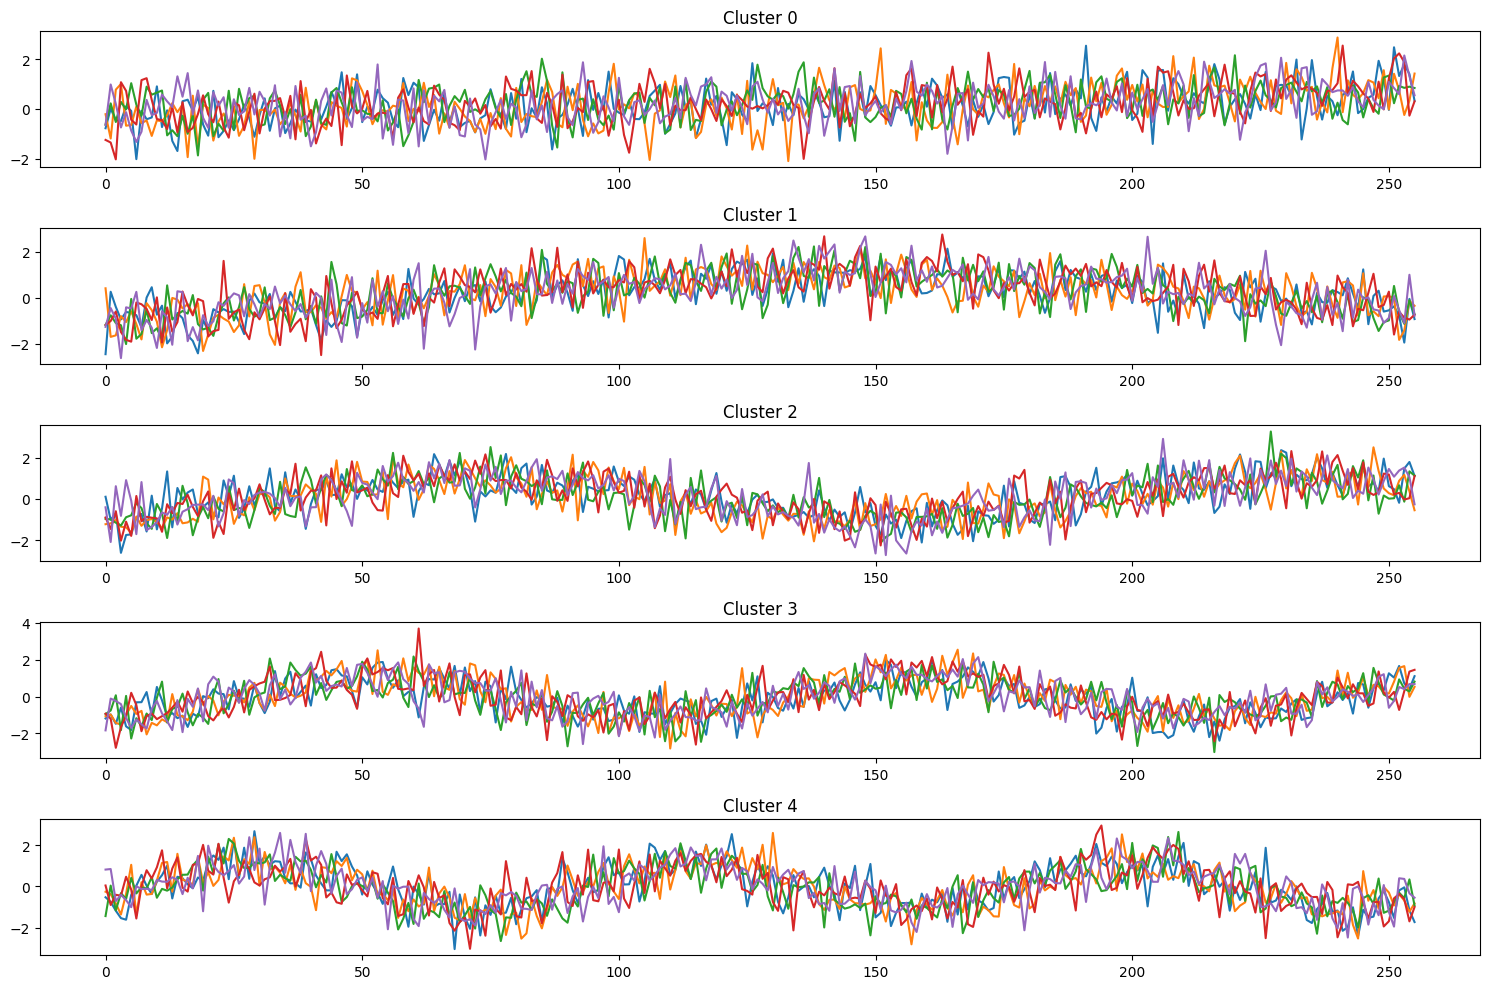

In [2]:
import matplotlib.pyplot as plt
import numpy as np
frequencies = [0.1, 0.4, 0.8, 1.2, 1.5]
frequencies_shift = [42,60,60,110,180]
n_samples = 100
n_features = 256
n_clusters = 5

# Create random timeseries data
timeseries = []
cluster_indices = []

for cluster in range(n_clusters):
    for _ in range(n_samples):
        freq = frequencies[cluster]
        x = np.linspace(0, 4 * np.pi, n_features)
        y = np.cos(freq * x + frequencies_shift[cluster]) + np.random.normal(0, 0.7, n_features)
        timeseries.append(y)
        cluster_indices.append(cluster)

timeseries = np.array(timeseries)
cluster_indices = np.array(cluster_indices)

# Plot a few timeseries from each cluster
plt.figure(figsize=(15, 10))
for cluster in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster + 1)
    for i in range(5):
        plt.plot(timeseries[cluster * n_samples + i])
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()


In [ ]:
import os
os.add_dll_directory(os.path.join(os.getcwd(), 'kmax'))
import kmax_rs

# Predicted clusters :


In [11]:
results = kmax_rs.kmax(5, timeseries, 300, 1e-7)
results

{'k_clusters': 5,
 'centroids': array([[-0.9647761 , -1.01962055, -1.06464821, ...,  0.8921169 ,
          0.86471373,  0.75445482],
        [-1.02000332, -0.97061977, -0.83456841, ..., -0.69299793,
         -0.44645042, -0.57044594],
        [-0.4639205 , -0.29399444, -0.44996749, ...,  0.80251933,
          0.76463055,  0.83974314],
        [-0.62385544, -0.43135377, -0.55642972, ..., -0.70066082,
         -0.54685054, -0.59175308],
        [-0.90517605, -0.77684802, -0.81451633, ...,  0.76043707,
          0.43264073,  0.55590103]], shape=(5, 256)),
 'clusters': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Ground truth : 

In [12]:
cluster_indices


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,